In [51]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
df=pd.read_csv("housing.csv")
df

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,2003-01-01,5.3,127.652,5.9160,145.7576,151.000,1808.0,5.020586,289412.0,6902.565955,...,1049.0,11174.129,68.1,1853.0,6704.0,66.4,817.8,4.0,5.8,186000.0
1,2003-02-01,5.2,128.326,5.8425,130.6707,151.100,1854.0,5.033049,289606.0,7075.901527,...,1044.0,11174.129,68.1,1629.0,6667.0,66.4,817.7,4.5,5.9,186000.0
2,2003-03-01,4.9,129.308,5.7450,139.9231,151.100,1757.0,5.041488,289809.0,6821.265342,...,1044.0,11174.129,68.1,1726.0,6654.0,66.3,821.1,4.1,5.9,186000.0
3,2003-04-01,5.0,130.488,5.8125,143.4302,150.700,1803.0,5.046002,290024.0,6943.281101,...,1043.0,11312.766,68.2,1643.0,6689.0,66.4,828.9,4.1,6.0,191800.0
4,2003-05-01,5.3,131.839,5.4840,143.7160,151.100,1835.0,5.046002,290250.0,7306.494473,...,1047.0,11312.766,68.2,1751.0,6706.0,66.4,829.0,3.9,6.1,191800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2023-03-01,5.2,297.316,6.5440,93.3392,326.838,1437.0,5.811222,334753.0,6267.106393,...,1667.5,26813.601,66.0,1380.0,7890.0,62.6,931.6,8.1,3.5,429000.0
243,2023-04-01,5.2,301.469,6.3425,92.2793,327.097,1417.0,5.821432,334880.0,5711.801065,...,1667.5,27063.012,65.9,1348.0,7901.0,62.6,928.1,7.6,3.4,418500.0
244,2023-05-01,5.3,305.427,6.4250,97.6334,329.026,1496.0,5.821432,335013.0,6297.113648,...,1667.5,27063.012,65.9,1583.0,7926.0,62.6,927.8,7.2,3.7,418500.0
245,2023-06-01,4.9,308.307,6.7140,97.0416,328.710,1441.0,5.821432,335163.0,6087.608141,...,1667.5,27063.012,65.9,1418.0,7955.0,62.6,929.5,7.5,3.6,418500.0


In [53]:
df.head()

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,2003-01-01,5.3,127.652,5.9160,145.7576,151.0,1808.0,5.020586,289412.0,6902.565955,...,1049.0,11174.129,68.1,1853.0,6704.0,66.4,817.8,4.0,5.8,186000.0
1,2003-02-01,5.2,128.326,5.8425,130.6707,151.1,1854.0,5.033049,289606.0,7075.901527,...,1044.0,11174.129,68.1,1629.0,6667.0,66.4,817.7,4.5,5.9,186000.0
2,2003-03-01,4.9,129.308,5.7450,139.9231,151.1,1757.0,5.041488,289809.0,6821.265342,...,1044.0,11174.129,68.1,1726.0,6654.0,66.3,821.1,4.1,5.9,186000.0
3,2003-04-01,5.0,130.488,5.8125,143.4302,150.7,1803.0,5.046002,290024.0,6943.281101,...,1043.0,11312.766,68.2,1643.0,6689.0,66.4,828.9,4.1,6.0,191800.0
4,2003-05-01,5.3,131.839,5.4840,143.7160,151.1,1835.0,5.046002,290250.0,7306.494473,...,1047.0,11312.766,68.2,1751.0,6706.0,66.4,829.0,3.9,6.1,191800.0


In [54]:
df.tail()

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
242,2023-03-01,5.2,297.316,6.5440,93.3392,326.838,1437.0,5.811222,334753.0,6267.106393,...,1667.5,26813.601,66.0,1380.0,7890.0,62.6,931.6,8.1,3.5,429000.0
243,2023-04-01,5.2,301.469,6.3425,92.2793,327.097,1417.0,5.821432,334880.0,5711.801065,...,1667.5,27063.012,65.9,1348.0,7901.0,62.6,928.1,7.6,3.4,418500.0
244,2023-05-01,5.3,305.427,6.4250,97.6334,329.026,1496.0,5.821432,335013.0,6297.113648,...,1667.5,27063.012,65.9,1583.0,7926.0,62.6,927.8,7.2,3.7,418500.0
245,2023-06-01,4.9,308.307,6.7140,97.0416,328.710,1441.0,5.821432,335163.0,6087.608141,...,1667.5,27063.012,65.9,1418.0,7955.0,62.6,929.5,7.5,3.6,418500.0
246,2023-07-01,4.1,310.162,6.8400,94.5577,331.181,1443.0,5.821432,335329.0,5311.264970,...,1667.5,27623.543,66.0,1451.0,7967.0,62.6,922.6,7.0,3.5,431000.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  247 non-null    object 
 1   p_saving_rate         247 non-null    float64
 2   target                247 non-null    float64
 3   mortgage_rate         247 non-null    float64
 4   IPI_Cement            247 non-null    float64
 5   PPI_Cement            247 non-null    float64
 6   permit                247 non-null    float64
 7   PPI_Concrete          247 non-null    float64
 8   population            247 non-null    float64
 9   new_private_house     247 non-null    float64
 10  emratio               247 non-null    float64
 11  income                247 non-null    float64
 12  new_private_hw_under  247 non-null    float64
 13  GDP                   247 non-null    float64
 14  home_ow_rate          247 non-null    float64
 15  house_st              2

In [56]:
df.shape

(247, 22)

In [57]:
df.describe()

,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,5.566194,184.079113,4.734370,113.609874,217.762453,1313.012146,5.349759,315387.149798,4787.894144,60.202328,...,1021.295547,17536.723441,66.194332,1253.631579,6813.214575,63.982591,778.746154,6.141700,5.888664,283285.829960
std,2.176049,45.414201,1.135548,28.196536,41.047363,473.547059,0.195784,13928.173534,2006.753607,1.826177,...,349.333404,4091.442895,1.814813,455.086588,760.697978,1.610427,136.983277,1.844091,1.904646,69392.011806
min,1.400000,127.652000,2.684000,66.350800,149.400000,513.000000,5.020586,289412.000000,1685.483171,55.025000,...,414.000000,11174.129000,63.100000,478.000000,5427.000000,60.100000,556.900000,3.300000,3.400000,186000.000000
25%,4.500000,148.460000,3.822500,96.735700,189.650000,996.000000,5.245180,303600.500000,3029.435338,58.700000,...,748.500000,14448.882000,64.700000,924.000000,6143.500000,62.800000,656.450000,4.850000,4.450000,228100.000000
50%,5.500000,174.938000,4.490000,102.648800,207.900000,1296.000000,5.312220,316535.000000,4649.445547,60.000000,...,1080.000000,16728.687000,65.900000,1224.000000,6967.000000,63.400000,803.000000,5.600000,5.400000,264800.000000
75%,6.400000,203.252000,5.825000,140.809050,249.400000,1656.500000,5.517453,328606.500000,5891.765246,62.200000,...,1242.500000,20328.553000,68.000000,1571.000000,7459.500000,65.900000,893.150000,7.300000,7.250000,320500.000000
max,11.275000,310.162000,6.900000,192.032200,331.181000,2263.000000,5.821432,335329.000000,10017.121097,63.400000,...,1667.500000,27623.543000,69.400000,2273.000000,7967.000000,66.500000,1022.000000,10.250000,9.600000,479500.000000


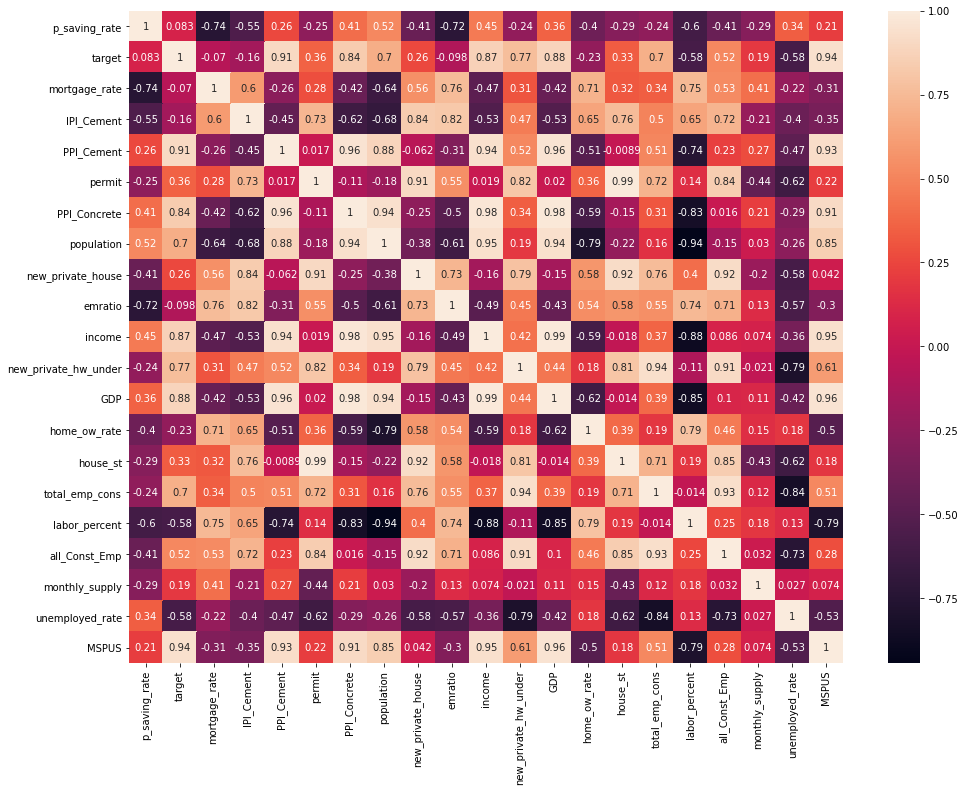

In [58]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

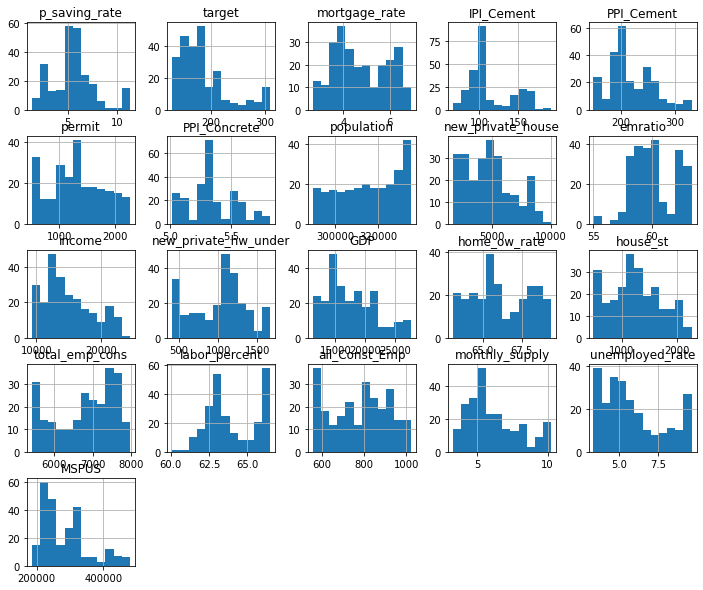

In [59]:
df.hist(bins=12,figsize=(12,10))
plt.show()

In [60]:
x = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
x_train

,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,income,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
150,5.6,4.0460,112.8845,223.900,1140.0,5.344246,322186.0,3683.744269,59.3,15518.6,908.0,18401.626,63.6,1146.0,6472.0,62.6,697.7,5.20,5.2,295800.0
225,6.6,3.0675,97.2735,271.977,1727.0,5.608798,332692.0,4949.613065,59.0,21201.4,1464.0,24654.603,65.5,1572.0,7514.0,61.8,882.8,6.80,4.5,423600.0
100,6.3,4.6375,83.0405,188.000,618.0,5.297317,311935.0,1800.636146,58.3,13239.1,415.0,15557.539,66.0,561.0,5516.0,64.1,560.1,6.60,9.0,228100.0
67,3.1,6.4775,126.4443,207.900,858.0,5.255932,304903.0,3815.917768,62.0,12426.0,936.0,14898.999,67.7,844.0,7114.0,66.1,800.3,10.25,6.1,226500.0
4,5.3,5.4840,143.7160,151.100,1835.0,5.046002,290250.0,7306.494473,62.3,9414.4,1047.0,11312.766,68.2,1751.0,6706.0,66.4,829.0,3.90,6.1,191800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2.0,5.7740,160.2513,180.200,2263.0,5.101085,296606.0,8289.072662,62.8,10687.7,1377.0,13142.642,68.7,2151.0,7415.0,66.1,967.6,4.70,5.0,236400.0
124,5.3,3.5360,99.5607,197.500,1003.0,5.322034,316729.0,2454.518595,58.6,14052.5,620.0,16728.687,65.1,930.0,5829.0,63.4,610.4,4.60,7.5,268100.0
131,4.5,4.4575,99.2019,197.400,1005.0,5.312220,318276.0,2753.263423,58.7,14266.5,707.0,17192.019,65.1,1002.0,5932.0,62.9,628.6,5.20,6.7,273600.0
158,5.9,3.6940,118.9009,229.600,1118.0,5.375278,323871.0,3752.005219,59.8,15731.6,987.0,18525.933,63.5,1111.0,6678.0,63.0,720.5,5.50,5.0,299800.0


In [64]:
x_train.shape

(197, 20)

In [65]:
x_test

,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,income,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
177,6.000,3.8950,98.9506,243.800,1360.0,5.517453,327528.0,4649.445547,60.100,16930.8,1101.0,20037.088,64.0,1257.0,7031.0,62.7,759.7,5.50,4.2,337900.0
38,3.300,6.3240,174.8640,195.300,2118.0,5.135210,297950.0,10017.121097,63.100,11171.8,1423.0,13599.160,68.6,1969.0,7689.0,66.2,1017.8,5.90,4.7,247700.0
69,4.900,6.2000,118.4615,207.800,736.0,5.288772,305403.0,3990.362711,61.700,12446.5,876.0,14608.209,67.5,777.0,6967.0,66.0,766.4,10.25,6.5,222500.0
231,3.100,4.9825,97.8230,287.439,1795.0,5.722450,333184.0,5442.568718,59.900,21581.3,1667.5,25544.273,65.9,1803.0,7698.0,62.2,918.3,8.50,3.6,449300.0
187,6.600,4.5500,103.0046,249.600,1293.0,5.527841,329040.0,4963.990424,60.300,17664.0,1129.0,20798.730,64.4,1288.0,7347.0,62.6,802.1,6.50,3.8,330900.0
112,7.900,3.7980,92.7701,188.700,796.0,5.307277,314368.0,2112.754533,58.500,13850.3,474.0,16207.115,65.6,708.0,5604.0,63.7,574.0,4.70,8.2,238700.0
101,6.500,4.5100,85.5086,186.900,636.0,5.297317,312147.0,1921.170280,58.200,13295.7,416.0,15557.539,66.0,608.0,5528.0,64.0,567.5,6.60,9.1,228100.0
220,9.900,2.9625,99.2814,268.200,1680.0,5.598422,332144.0,5325.825724,58.000,20899.7,1338.0,23292.362,65.5,1600.0,7394.0,61.5,855.8,5.60,5.8,382600.0
191,8.400,4.6375,96.3338,249.900,1320.0,5.521461,329659.0,3981.146568,60.600,18012.4,1148.0,20917.867,64.6,1095.0,7396.0,63.0,812.7,7.60,3.9,322800.0
40,2.900,6.5975,160.6514,197.600,1905.0,5.138149,298401.0,8157.834744,63.100,11251.1,1409.0,13753.424,68.8,1942.0,7713.0,66.1,1016.6,6.20,4.6,246300.0


In [66]:
x_test.shape

(50, 20)

In [67]:
y_train

150    174.496
225    273.682
100    140.694
67     164.277
4      131.839
        ...   
32     177.611
124    153.860
131    159.282
158    176.603
203    212.248
Name: target, Length: 197, dtype: float64

In [68]:
y_train

150    174.496
225    273.682
100    140.694
67     164.277
4      131.839
        ...   
32     177.611
124    153.860
131    159.282
158    176.603
203    212.248
Name: target, Length: 197, dtype: float64

In [69]:
y_train.shape

(197,)

In [70]:
y_test.shape

(50,)

In [71]:
lg=LogisticRegression()

In [72]:
lg.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
pred=lg.predict(x_test)
print(pred)